## OPTIMIZATION OF AGRICULTURAL PRODUCTION

Making the decision about which crops to grow in a specific region is extremely important. In making this decision, environmental conditions should be taken into account and thus, it should be ensured that the most suitable conditions are provided for the crops to be grown.

In this project, it is aimed to find the appropriate crop to be grown in different regions according to the values of parameters such as temperature, humidity, pH, rain and N, P, K elements in the soil belonging to these regions. Various predictive algorithms have been used to find the appropriate crop.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from ipywidgets import interact
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir('C:\\Users\\baris\\Desktop\\Data Science')

In [3]:
data = pd.read_csv('data.csv')
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,NaN,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data.shape

(2200, 8)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2193 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2193.0,25.625673,5.068336,8.825675,22.778565,25.612944,28.568006,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


In [7]:
# Checking if there is any missing value in the dataset
data.isnull().sum()

N              0
P              0
K              0
temperature    7
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data['temperature'] = data['temperature'].fillna(data['temperature'].mean()) 
#filled missing values in Temperature column with mean values

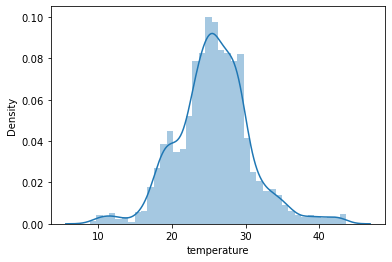

In [9]:
sns.distplot(data.temperature)
plt.show()

In [10]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [12]:
# Checking the summary for all the crops

print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['N'].mean()))
print("Average Ratio of Phosphorus in the Soil : {0:.2f}".format(data['P'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['K'].mean()))
print("Average Temperature in Celsius : {0:.2f}".format(data['temperature'].mean()))
print("Average Relative Humidity in % : {0:.2f}".format(data['humidity'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['ph'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 50.55
Average Ratio of Phosphorus in the Soil : 53.36
Average Ratio of Potassium in the Soil : 48.15
Average Temperature in Celsius : 25.63
Average Relative Humidity in % : 71.48
Average PH Value of the soil : 6.47
Average Rainfall in mm : 103.46


In [13]:
# The Summary Statistics for each of the Crops

@interact

def Summary(crops = list(data['label'].value_counts().index)):
    x = data[data['label'] == crops]
    print("________________________________________________")
    print("Statistics for Nitrogen")
    print("Minimum Nitrogen required :", x['N'].min())
    print("Average Nitrogen required :", x['N'].mean())
    print("Maximum Nitrogen required :", x['N'].max())
    print("________________________________________________")
    print("Statistics for Phosphorus")
    print("Minimum Phosphorus required :", x['P'].min())
    print("Average Phosphorus required :", x['P'].mean())
    print("Maximum Phosphorus required :", x['P'].max())
    print("________________________________________________")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['K'].min())
    print("Average Potassium required :", x['K'].mean())
    print("Maximum Potassium required :", x['K'].max())
    print("________________________________________________")
    print("Statistics for Temperature")
    print("Minimum Temperature required :", x['N'].min())
    print("Average Temperature required :", x['N'].mean())
    print("Maximum Temperature required :", x['N'].max())
    print("________________________________________________")
    print("Statistics for Humidity")
    print("Minimum Humidity required :", x['humidity'].min())
    print("Average Humidity required :", x['humidity'].mean())
    print("Maximum Humidity required :", x['humidity'].max())
    print("________________________________________________")
    print("Statistics for PH")
    print("Minimum PH required :", x['ph'].min())
    print("Average PH required :", x['ph'].mean())
    print("Maximum PH required :", x['ph'].max())
    print("________________________________________________")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required :", x['rainfall'].min())
    print("Average Rainfall required :", x['rainfall'].mean())
    print("Maximum Rainfall required :", x['rainfall'].max())  

interactive(children=(Dropdown(description='crops', options=('rice', 'maize', 'jute', 'cotton', 'coconut', 'pa…

In [14]:
# Comparison of the Average Requirement for each crops with average conditions

@interact
def comparison(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("________________________________________________")
    print("Rice : {0:.2f}".format(data[(data['label'] == 'rice')][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['label'] == 'maize')][conditions].mean()))
    print("Jute : {0:.2f}".format(data[(data['label'] == 'jute')][conditions].mean()))
    print("Cotton : {0:.2f}".format(data[(data['label'] == 'cotton')][conditions].mean()))
    print("Coconut : {0:.2f}".format(data[(data['label'] == 'coconut')][conditions].mean()))
    print("Papaya : {0:.2f}".format(data[(data['label'] == 'papaya')][conditions].mean()))
    print("Orange : {0:.2f}".format(data[(data['label'] == 'orange')][conditions].mean()))
    print("Apple : {0:.2f}".format(data[(data['label'] == 'apple')][conditions].mean()))
    print("Muskmelon : {0:.2f}".format(data[(data['label'] == 'muskmelon')][conditions].mean()))
    print("Watermelon : {0:.2f}".format(data[(data['label'] == 'watermelon')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[(data['label'] == 'grapes')][conditions].mean()))
    print("Mango : {0:.2f}".format(data[(data['label'] == 'mango')][conditions].mean()))
    print("Banana : {0:.2f}".format(data[(data['label'] == 'banana')][conditions].mean()))
    print("Pomegranate : {0:.2f}".format(data[(data['label'] == 'pomegranate')][conditions].mean()))
    print("Lentil : {0:.2f}".format(data[(data['label'] == 'lentil')][conditions].mean()))
    print("Blackgram : {0:.2f}".format(data[(data['label'] == 'blackgram')][conditions].mean()))
    print("Mungbean : {0:.2f}".format(data[(data['label'] == 'mungbean')][conditions].mean()))
    print("Mothbeans : {0:.2f}".format(data[(data['label'] == 'mothbeans')][conditions].mean()))
    print("Pigeonpeas : {0:.2f}".format(data[(data['label'] == 'pigeonpeas')][conditions].mean()))
    print("Kidneybeans : {0:.2f}".format(data[(data['label'] == 'kidneybeans')][conditions].mean()))
    print("Chickpea : {0:.2f}".format(data[(data['label'] == 'chickpea')][conditions].mean()))
    print("Coffee : {0:.2f}".format(data[(data['label'] == 'coffee')][conditions].mean()))

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [15]:
# Building a more detailed function for the conditions examined above

@interact

def comparison(conditions = ['N','P','K','temperature','ph','humidity','rainfall']):
    print("Crops which require greater than average", conditions, '\n')
    print(data[data[conditions] > data[conditions].mean()]['label'].unique())
    print("________________________________________________")
    print("Crops which require less than average", conditions, '\n')
    print(data[data[conditions] < data[conditions].mean()]['label'].unique())  

interactive(children=(Dropdown(description='conditions', options=('N', 'P', 'K', 'temperature', 'ph', 'humidit…

In [16]:
#Inspection for the case where the temperature is more than 42 Celsius and the humidity is more than 90 g/m3 
data[(data.temperature>42) & (data.humidity>90)]

,N,P,K,temperature,humidity,ph,rainfall,label
1701,58,46,45,42.394134,90.790281,6.576261,88.466075,papaya
1704,31,68,45,42.923253,90.076005,6.938313,196.240824,papaya
1710,58,51,47,42.134740,91.704454,6.757471,197.402901,papaya
1722,61,64,52,43.302049,92.834054,6.641099,110.562229,papaya
1738,44,57,53,42.304958,90.514318,6.931721,74.876786,papaya
1742,70,68,55,42.846093,94.635482,6.691202,78.809964,papaya
1743,59,62,52,43.675493,93.108872,6.608668,103.823566,papaya
1744,60,58,51,42.072138,92.922031,6.840802,165.741297,papaya
1748,36,54,46,42.547440,94.944821,6.662876,214.410385,papaya
1750,37,52,47,43.080227,93.903057,6.542777,211.852906,papaya


In [17]:
# Finding out the crops which can only be Grown in Summer Season, Winter Season and Rainy Season

print("Summer Crops")
print(data[(data['temperature'] > 30) & (data['humidity'] > 55)]['label'].unique())
print("________________________________________________")
print("Winter Crops")
print(data[(data['temperature'] < 19) & (data['humidity'] > 25)]['label'].unique())
print("________________________________________________")
print("Rainy Season Crops")
print(data[(data['rainfall'] > 220) & (data['humidity'] > 30)]['label'].unique())


Summer Crops
['pigeonpeas' 'mothbeans' 'blackgram' 'grapes' 'orange' 'papaya']
________________________________________________
Winter Crops
['maize' 'pigeonpeas' 'lentil' 'pomegranate' 'grapes' 'orange']
________________________________________________
Rainy Season Crops
['rice' 'papaya' 'coconut']


## Distribution

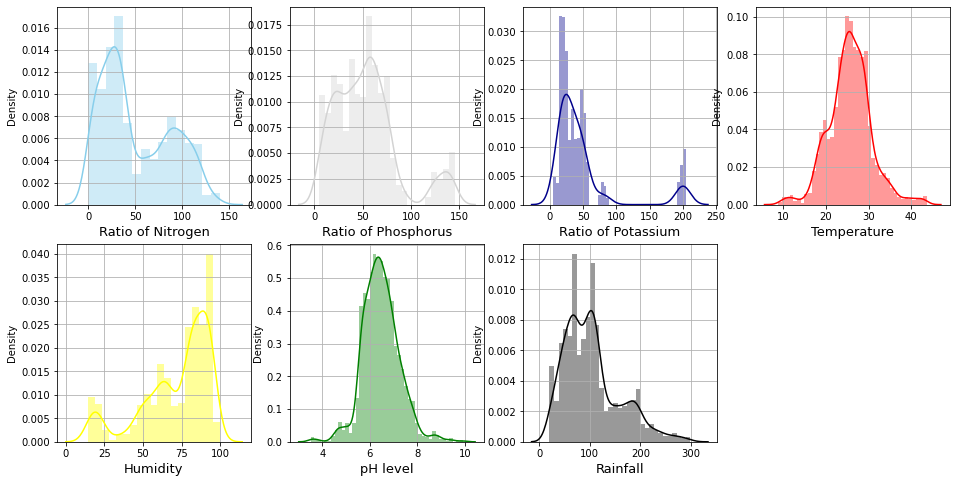

In [18]:
# Checking the distribution of Agricultural Conditions

plt.rcParams['figure.figsize'] = (16, 8)

plt.subplot(2,4,1)
sns.distplot(data['N'], color = 'skyblue')
plt.xlabel('Ratio of Nitrogen', fontsize = 13)
plt.grid()

plt.subplot(2,4,2)
sns.distplot(data['P'], color = 'lightgrey')
plt.xlabel('Ratio of Phosphorus', fontsize = 13)
plt.grid()

plt.subplot(2,4,3)
sns.distplot(data['K'], color = 'darkblue')
plt.xlabel('Ratio of Potassium', fontsize = 13)
plt.grid()

plt.subplot(2,4,4)
sns.distplot(data['temperature'], color = 'red')
plt.xlabel('Temperature', fontsize = 13)
plt.grid()

plt.subplot(2,4,5)
sns.distplot(data['humidity'], color = 'yellow')
plt.xlabel('Humidity', fontsize = 13)
plt.grid()

plt.subplot(2,4,6)
sns.distplot(data['ph'], color = 'green')
plt.xlabel('pH level', fontsize = 13)
plt.grid()

plt.subplot(2,4,7)
sns.distplot(data['rainfall'], color = 'black')
plt.xlabel('Rainfall', fontsize = 13)
plt.grid()

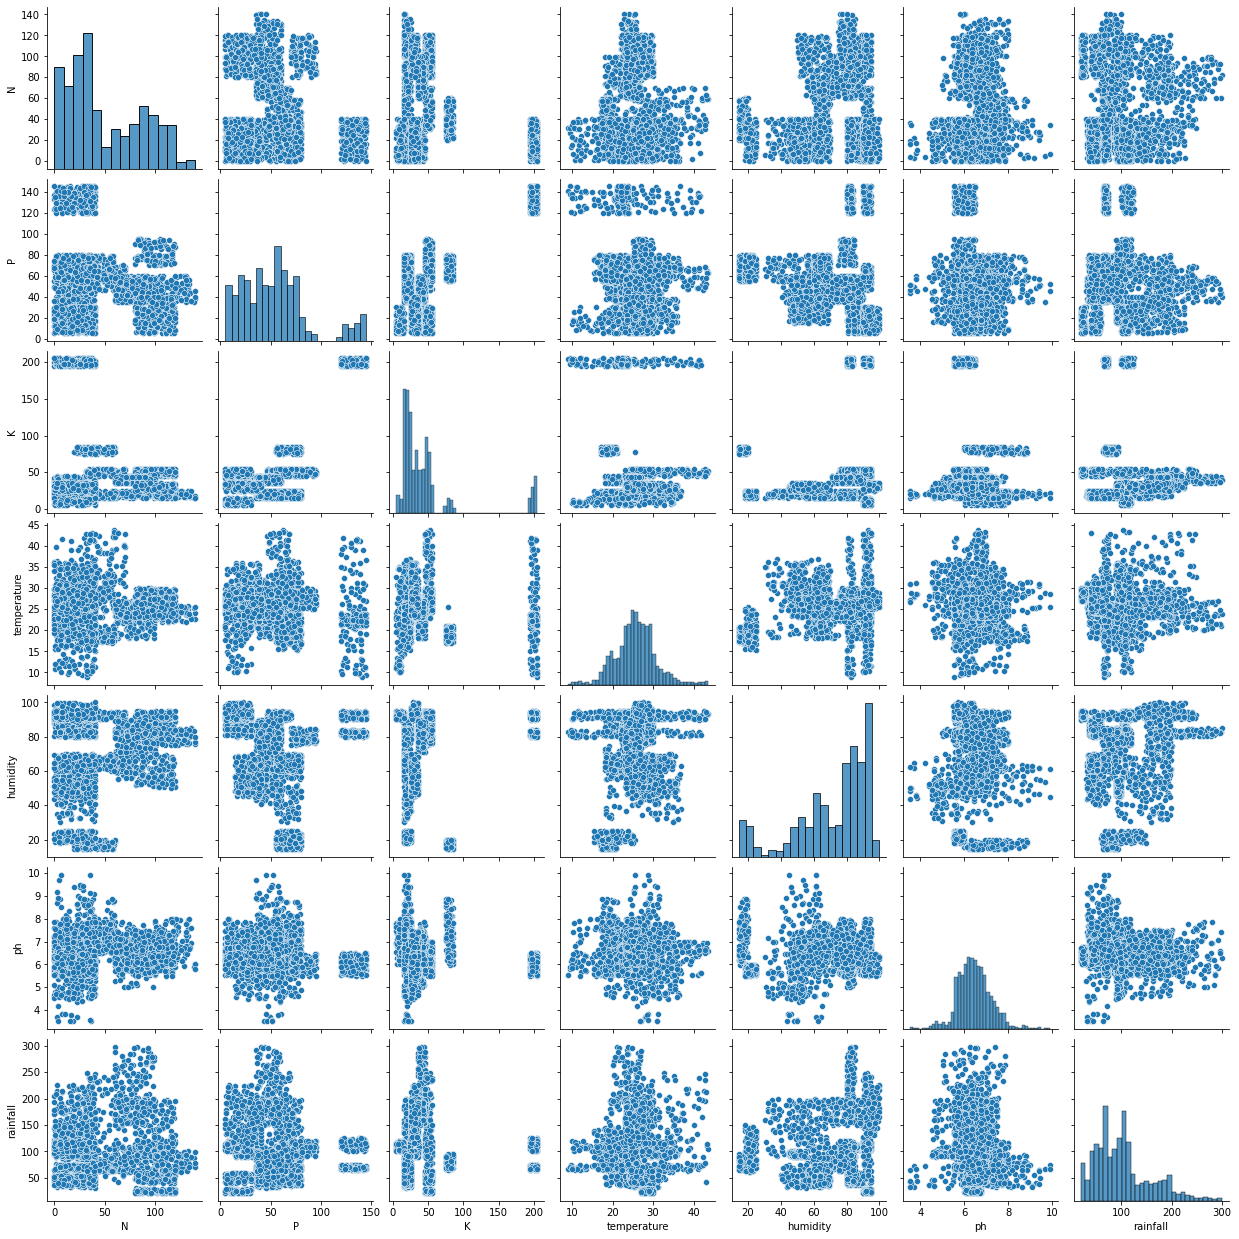

In [19]:
sns.pairplot(data)

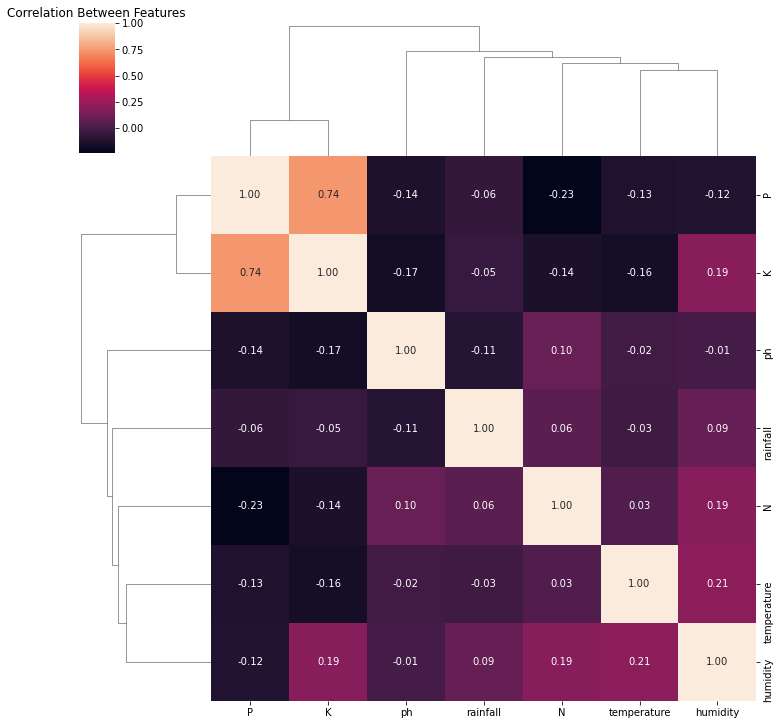

In [20]:
corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Between Features')
plt.show()

## Building Predictive Models

In [21]:
# Clustering the Crops

from sklearn.cluster import KMeans

x = data.loc[:,['N','P','K','temperature','ph','humidity','rainfall']].values

print(x.shape)

x_data = pd.DataFrame(x)
x_data.head()

(2200, 7)


,0,1,2,3,4,5,6
0,90.0,42.0,43.0,20.879744,6.502985,82.002744,202.935536
1,85.0,58.0,41.0,21.770462,7.038096,80.319644,226.655537
2,60.0,55.0,44.0,25.625673,7.840207,82.320763,263.964248
3,74.0,35.0,40.0,26.491096,6.980401,80.158363,242.864034
4,78.0,42.0,42.0,20.130175,7.628473,81.604873,262.717340


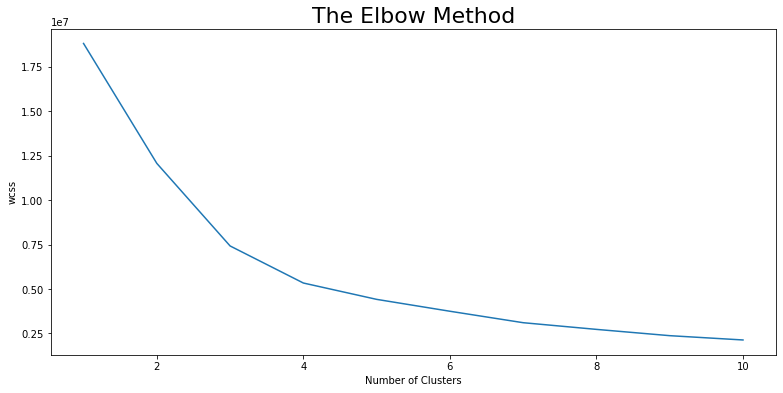

In [22]:
# Determining the optimum number of clusters via using elbow method

plt.rcParams['figure.figsize'] = (13,6)

# WCSS(Within-Cluster Sum Of Square). 
# WCSS is defined as the sum of squared distance between each point and the centroid in a cluster.

wcss = []
for a in range(1,11):
    km = KMeans(n_clusters = a, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
    km.fit(x)
    wcss.append(km.inertia_)

# Plotting the results

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method', fontsize = 22)
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

In [23]:
# Implementing the K Means algorithm to perform Clustering Analysis

km = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init=10 , random_state = 42)
y_means = km.fit_predict(x)

# Finding out the Results

b = data['label']
y_means = pd.DataFrame(y_means)
z = pd.concat([y_means, b], axis = 1)
z = z.rename(columns = {0: 'cluster'})

# Checking the Clusters of each Crops

print("Results After Applying the K Means Clustering Analysis \n")
print("Crops in First Cluster:", z[z['cluster'] == 0]['label'].unique())
print("________________________________________________")
print("Crops in Second Cluster:", z[z['cluster'] == 1]['label'].unique())
print("________________________________________________")
print("Crops in Third Cluster:", z[z['cluster'] == 2]['label'].unique())
print("________________________________________________")
print("Crops in Fourth Cluster:", z[z['cluster'] == 3]['label'].unique())

Results After Applying the K Means Clustering Analysis 

Crops in First Cluster: ['maize' 'chickpea' 'kidneybeans' 'pigeonpeas' 'mothbeans' 'mungbean'
 'blackgram' 'lentil' 'pomegranate' 'mango' 'orange' 'papaya' 'coconut']
________________________________________________
Crops in Second Cluster: ['rice' 'pigeonpeas' 'papaya' 'coconut' 'jute' 'coffee']
________________________________________________
Crops in Third Cluster: ['maize' 'banana' 'watermelon' 'muskmelon' 'papaya' 'cotton' 'coffee']
________________________________________________
Crops in Fourth Cluster: ['grapes' 'apple']


In [24]:
# Splitting the Dataset for Predictive Modelling

y = data['label']
x = data.drop(['label'], axis = 1)

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (2200, 7)
Shape of y: (2200,)


In [25]:
# Creating Training and Testing Sets for Validation of Results
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("The Shape of x train:", x_train.shape)
print("The Shape of x train:", x_test.shape)
print("The Shape of y train:", y_train.shape)
print("The Shape of y train:", y_test.shape)

The Shape of x train: (1760, 7)
The Shape of x train: (440, 7)
The Shape of y train: (1760,)
The Shape of y train: (440,)


In [27]:
# Creating the Predictive Model - Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred1 = logreg.predict(x_test)

In [28]:
# Evaluating the Model Permormance - Logistic Regression
from sklearn.metrics import classification_report

cr1 = classification_report(y_test, y_pred1)
print(cr1)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       0.95      1.00      0.98        21
   blackgram       0.83      0.75      0.79        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       0.94      1.00      0.97        17
      cotton       0.80      0.94      0.86        17
      grapes       1.00      1.00      1.00        14
        jute       0.87      0.87      0.87        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.83      0.91      0.87        11
       maize       0.94      0.71      0.81        21
       mango       0.95      1.00      0.97        19
   mothbeans       0.85      0.92      0.88        24
    mungbean       0.95      1.00      0.97        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       0.95    

In [29]:
# Creating the Predictive Model - KNN classifier

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(x_train,y_train)
y_pred2 = knn.predict(x_test)

In [30]:
# Evaluating the Model Permormance - KNN Classifier
from sklearn.metrics import classification_report

cr2 = classification_report(y_test, y_pred2)
print(cr2)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      0.94      0.97        17
      cotton       0.89      0.94      0.91        17
      grapes       1.00      1.00      1.00        14
        jute       0.81      0.91      0.86        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.85      1.00      0.92        11
       maize       0.95      0.90      0.93        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [31]:
# Creating the Predictive Model - Naive Bayes

from sklearn.naive_bayes import GaussianNB

nb=GaussianNB()
nb.fit(x_train,y_train)
y_pred3 = nb.predict(x_test)

In [32]:
# Evaluating the Model Permormance - Naive Bayes
from sklearn.metrics import classification_report

cr3 = classification_report(y_test, y_pred3)
print(cr3)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      1.00      1.00        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00        14
      papaya       1.00    

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth = 3, random_state=42)
rf.fit(x_train, y_train)
y_pred4 = rf.predict(x_test)

In [34]:
# Evaluating the Model Permormance - RFC
from sklearn.metrics import classification_report

cr4 = classification_report(y_test, y_pred4)
print(cr4)

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.51      1.00      0.68        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      0.96      0.98        27
      coffee       0.81      1.00      0.89        17
      cotton       0.85      1.00      0.92        17
      grapes       1.00      1.00      1.00        14
        jute       1.00      0.04      0.08        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.42      1.00      0.59        11
       maize       1.00      0.86      0.92        21
       mango       0.86      1.00      0.93        19
   mothbeans       0.00      0.00      0.00        24
    mungbean       0.90      1.00      0.95        19
   muskmelon       1.00      1.00      1.00        17
      orange       0.93      1.00      0.97        14
      papaya       1.00    

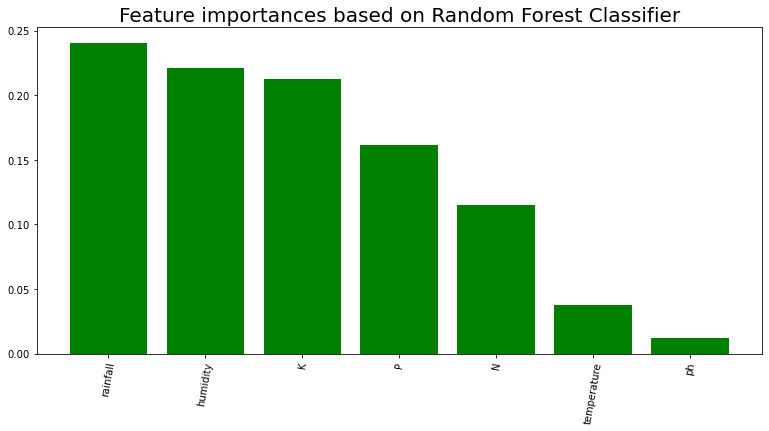

In [35]:
ranking = rf.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = x.columns

plt.title("Feature importances based on Random Forest Classifier", y = 1, size = 20)
plt.bar(range(len(features)), ranking[features], color="green", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

## Summary of the Results

In [36]:
print("The Accuracy of Logistic Regression:", logreg.score(x_test, y_test))
print("The Accuracy of K Neighbors Classifier:", knn.score(x_test, y_test))
print("The Accuracy of Naive Bayes:", nb.score(x_test, y_test))
print("The Accuracy of Random Forest Classifier:", rf.score(x_test, y_test))

The Accuracy of Logistic Regression: 0.9454545454545454
The Accuracy of K Neighbors Classifier: 0.9704545454545455
The Accuracy of Naive Bayes: 0.9954545454545455
The Accuracy of Random Forest Classifier: 0.85


Since our result variable is qualitative in the analyzed problem, this problem is a classification problem and appropriate predictive algorithms should be used. For example, Linear Regression should not be used.

The highest accuracy rates were observed in Naive Bayes, K Neighbors Classifier, Logistic Regression and Random Forest Classifier, respectively. However, when the results obtained after the examination of these predictive algorithms are examined, it can be said that the most serious overfit problem is observed for the Naive Bayes method. This may reduce the probability of making an accurate estimation on different and new data sets.

So this model can perform bad in terms of generalization. We want our predictive model to perform well not only on the current test set, but also on future test sets. So using validation methods is a more appropriate approach. However, its accuracy on the test set is quite high.

No method can outperform other methods in every scenario. The method that performs best in one dataset may perform worst in another dataset.